In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import cv2
from skimage.transform import resize

###Load the dataset with preprocessing on images

In [2]:
dataset = io.loadmat('/content/Data_hoda_full.mat')

x_train_original = np.squeeze(dataset['Data'][0:3500])
y_train_original = np.squeeze(dataset['labels'][0:3500])
x_test_original = np.squeeze(dataset['Data'][3500:3900])
y_test_original = np.squeeze(dataset['labels'][3500:3900])

# Resize
x_train_5by5 = [cv2.resize(img, (28, 28)) for img in x_train_original]
x_test_5by5 = [cv2.resize(img, (28, 28)) for img in x_test_original]
x_train = [x.reshape(784) for x in x_train_5by5]
x_test = [x.reshape(784) for x in x_test_5by5]

# Preprocess input data for Keras. 
x_train = np.array(x_train)
y_train = keras.utils.np_utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test)
y_test = keras.utils.np_utils.to_categorical(y_test_original, num_classes=10)

# Normalization and changing the format for Keras
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape to original image shape (n x 784) ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_train.reshape(-1, 28, 28, 1)

# Test and Validation set
x_val = x_test[200:]
x_test = x_test[:200]
y_val = y_test[200:]
y_test = y_test[:200]

In [3]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

###Let's compile our model

In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

###Let's fit our model on training data

In [8]:
memoryM = model.fit(x_train, y_train, epochs = 200, batch_size = 256, validation_split = 0.2)

Epoch 1/200
11/11 [==============================] - 2s 229ms/step - loss: 1.1246 - accuracy: 0.6093 - val_loss: 0.6546 - val_accuracy: 0.8014
Epoch 2/200
11/11 [==============================] - 2s 207ms/step - loss: 0.8165 - accuracy: 0.7136 - val_loss: 0.4779 - val_accuracy: 0.8514
Epoch 3/200
11/11 [==============================] - 2s 209ms/step - loss: 0.6365 - accuracy: 0.7811 - val_loss: 0.3844 - val_accuracy: 0.8729
Epoch 4/200
11/11 [==============================] - 2s 205ms/step - loss: 0.5747 - accuracy: 0.8029 - val_loss: 0.3247 - val_accuracy: 0.8943
Epoch 5/200
11/11 [==============================] - 2s 207ms/step - loss: 0.4733 - accuracy: 0.8421 - val_loss: 0.2875 - val_accuracy: 0.9057
Epoch 6/200
11/11 [==============================] - 2s 207ms/step - loss: 0.3911 - accuracy: 0.8689 - val_loss: 0.2169 - val_accuracy: 0.9229
Epoch 7/200
11/11 [==============================] - 2s 207ms/step - loss: 0.3422 - accuracy: 0.8896 - val_loss: 0.2136 - val_accuracy: 0.9171

<Figure size 432x288 with 0 Axes>

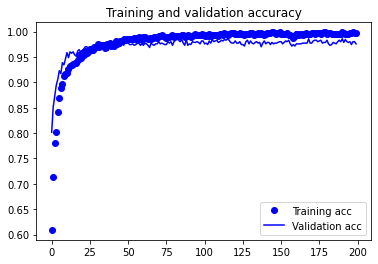

<Figure size 432x288 with 0 Axes>

In [11]:
acc = memoryM.history['accuracy']
val_acc = memoryM.history['val_accuracy']
loss = memoryM.history['loss']
val_loss = memoryM.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

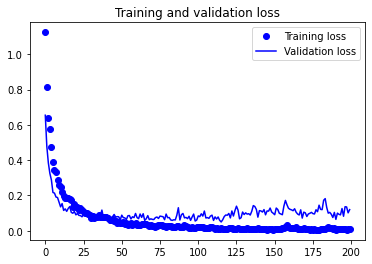

In [12]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()